In [174]:
# Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn import preprocessing

In [21]:
# Reading in data tables from https://calcofi.org/data/oceanographic-data/bottle-database/
df_bottle = pd.read_csv('../data//194903-202101_Bottle.csv', encoding='unicode_escape')
df_bottle

/var/folders/1j/227gtx89455_vcjz4mqv09ch0000gn/T/ipykernel_96909/2612310708.py:2: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bottle = pd.read_csv('../data//194903-202101_Bottle.csv', encoding='unicode_escape')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894475,35599,894476,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0500A-7,500,5.992,34.2128,0.539,26.94277,7.74,...,1.058,0.00,23.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894476,35599,894477,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0515A-3,515,5.911,34.2168,0.459,26.95630,6.58,...,1.080,0.00,19.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894477,35600,894478,093.4 026.4,20-2101RL-MX-016-0746-09340264-0000A-7,0,14.526,33.5682,6.352,24.98482,109.64,...,0.000,0.01,276.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894478,35600,894479,093.4 026.4,20-2101RL-MX-016-0746-09340264-0002A-3,2,14.526,33.5682,6.352,24.97098,109.64,...,0.006,0.00,276.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Find the number of unique values in 'object' type columns
object_columns = df_bottle.select_dtypes(include=['object']).columns
unique_values_per_object_column = df_bottle[object_columns].nunique()

# Display the number of unique values in 'object' type columns
print("Number of unique values in 'object' type columns:")
print(unique_values_per_object_column)

Number of unique values in 'object' type columns:
Sta_ID                   2646
Depth_ID               894458
IncTim                    203
DIC Quality Comment        37
dtype: int64


In [23]:
bottle = df_bottle.copy()
bottle.dropna(axis='columns', thresh=int(bottle.shape[0]*.80), inplace=True)
bottle.dropna(inplace=True)
bottle

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,...,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_Temp,R_Sal,R_DYNHT
2160,71,2161,044.0 048.5,19-4904CR-HY-087-0606-04400485-0000B-3,0,10.300,33.0300,5.900,25.36400,3,...,2.0,9.0,9.0,9.0,9.0,9.0,0.0,10.30,260.2,0.000
2162,71,2163,044.0 048.5,19-4904CR-HY-087-0606-04400485-0010A-7,10,10.290,32.9510,6.040,25.30400,7,...,3.0,9.0,9.0,9.0,9.0,9.0,10.0,10.29,266.1,0.020
2163,71,2164,044.0 048.5,19-4904CR-HY-087-0606-04400485-0015A-3,15,10.290,32.9900,6.060,25.33500,3,...,2.0,9.0,9.0,9.0,9.0,9.0,15.0,10.29,263.3,0.040
2164,71,2165,044.0 048.5,19-4904CR-HY-087-0606-04400485-0020A-7,20,10.330,33.0050,6.040,25.33900,7,...,3.0,9.0,9.0,9.0,9.0,9.0,20.0,10.33,262.9,0.050
2165,71,2166,044.0 048.5,19-4904CR-HY-087-0606-04400485-0030A-7,30,10.390,33.0540,6.010,25.36800,7,...,3.0,9.0,9.0,9.0,9.0,9.0,30.0,10.39,260.4,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894473,35599,894474,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0381A-3,381,6.864,34.0847,1.342,26.72612,3,...,3.0,4.0,9.0,9.0,9.0,9.0,384.0,6.83,137.2,0.911
894474,35599,894475,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0400A-7,400,6.627,34.1185,1.199,26.78473,7,...,3.0,4.0,9.0,9.0,9.0,9.0,403.0,6.59,131.8,0.932
894475,35599,894476,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0500A-7,500,5.992,34.2128,0.539,26.94277,7,...,3.0,4.0,9.0,9.0,9.0,9.0,504.0,5.95,117.7,1.058
894476,35599,894477,093.3 0120.0,20-2101RL-MX-019-0552-09331200-0515A-3,515,5.911,34.2168,0.459,26.95630,3,...,3.0,4.0,9.0,9.0,9.0,9.0,519.0,5.87,116.6,1.080


In [24]:
# bottle.to_csv("194903-202101_Bottle2.csv")
int(bottle.shape[0]*.95)

575826

In [25]:
df_cast = pd.read_csv('../data/194903-202101_Cast.csv', encoding='unicode_escape')
df_cast.head()
# df_cast.describe()

/var/folders/1j/227gtx89455_vcjz4mqv09ch0000gn/T/ipykernel_96909/3819364859.py:1: DtypeWarning: Columns (38,39,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cast = pd.read_csv('../data/194903-202101_Cast.csv', encoding='unicode_escape')


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility,Secchi,ForelU
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [26]:
# Find the number of unique values in 'object' type columns
object_columns = df_cast.select_dtypes(include=['object']).columns
unique_values_per_object_column = df_cast[object_columns].nunique()

# Display the number of unique values in 'object' type columns
print("Number of unique values in 'object' type columns:")
print(unique_values_per_object_column)

Number of unique values in 'object' type columns:
Cruise_ID        661
Cast_ID        35600
Sta_ID          2634
Sta_Code           7
Date            6725
Time            3877
Lat_Hem            1
Lon_Hem            1
Ship_Name         36
Ship_Code         34
Data_Type          5
Orig_Sta_ID     4190
Data_Or            5
Cruz_Num         396
Inc_Str          120
Inc_End          203
PST_LAN           80
Civil_T          181
dtype: int64


In [27]:
df = pd.merge(df_bottle, df_cast)
df
# df.nunique()
# df.dtypes

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility,Secchi,ForelU
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893590,35596,894405,093.3 090.0,20-2101RL-MX-018-1206-09330900-0500A-7,500,5.964,34.2703,0.357,26.99172,5.12,...,12.0,1011.9,16.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
893591,35596,894406,093.3 090.0,20-2101RL-MX-018-1206-09330900-0517A-3,517,5.859,34.2642,0.339,27.00023,4.85,...,12.0,1011.9,16.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
893592,35600,894478,093.4 026.4,20-2101RL-MX-016-0746-09340264-0000A-7,0,14.526,33.5682,6.352,24.98482,109.64,...,12.0,1015.2,16.5,12.0,NaN,NaN,NaN,NaN,NaN,NaN
893593,35600,894479,093.4 026.4,20-2101RL-MX-016-0746-09340264-0002A-3,2,14.526,33.5682,6.352,24.97098,109.64,...,12.0,1015.2,16.5,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.dropna(axis='columns', thresh=int(bottle.shape[0]*.95), inplace=True)
df.dropna(inplace=True)
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea
3771,124,3772,092.0 039.0,19-4904NS-HY-088-1948-09200390-0000B-3,0,13.86,33.570,5.72,25.112,97.4,...,1866.0,MV N.B. SCOFIELD,31NS,HY,125.0,092 39,4904,32.0,8.0,4.0
3772,124,3773,092.0 039.0,19-4904NS-HY-088-1948-09200390-0010A-3,10,13.65,33.420,5.45,25.039,92.3,...,1866.0,MV N.B. SCOFIELD,31NS,HY,125.0,092 39,4904,32.0,8.0,4.0
3773,124,3774,092.0 039.0,19-4904NS-HY-088-1948-09200390-0020A-7,20,13.54,33.488,5.58,25.115,94.3,...,1866.0,MV N.B. SCOFIELD,31NS,HY,125.0,092 39,4904,32.0,8.0,4.0
3774,124,3775,092.0 039.0,19-4904NS-HY-088-1948-09200390-0025A-3,25,13.51,33.550,5.70,25.169,96.3,...,1866.0,MV N.B. SCOFIELD,31NS,HY,125.0,092 39,4904,32.0,8.0,4.0
3775,124,3776,092.0 039.0,19-4904NS-HY-088-1948-09200390-0030A-7,30,13.50,33.556,5.71,25.176,96.5,...,1866.0,MV N.B. SCOFIELD,31NS,HY,125.0,092 39,4904,32.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,32580,817761,070.0 055.0,20-1101NM-MX-031-1553-07000550-0250A-7,250,8.03,34.108,1.45,26.573,21.8,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817762,32580,817763,070.0 055.0,20-1101NM-MX-031-1553-07000550-0300A-7,300,7.58,34.166,1.12,26.685,16.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817765,32580,817766,070.0 055.0,20-1101NM-MX-031-1553-07000550-0400A-7,400,6.95,34.191,0.72,26.794,10.6,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817767,32580,817768,070.0 055.0,20-1101NM-MX-031-1553-07000550-0500A-7,500,6.03,34.255,0.40,26.966,5.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0


In [37]:
df.tail(2000)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea
765355,30616,765356,086.7 110.0,20-0407JD-PR-203-1821-08671100-0500A-7,500,5.63,34.155,0.70,26.936,10.0,...,3935.0,RV DAVID STARR JORDAN,31JD,PR,422.0,87 110,0407,32.0,10.0,1.0
765398,30620,765399,090.0 030.0,20-0407JD-MX-200-2210-09000300-0200A-7,200,9.25,34.148,2.08,26.415,32.2,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,0407,24.0,6.0,1.0
765400,30620,765401,090.0 030.0,20-0407JD-MX-200-2210-09000300-0250A-7,250,8.72,34.184,1.75,26.528,26.8,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,0407,24.0,6.0,1.0
765402,30620,765403,090.0 030.0,20-0407JD-MX-200-2210-09000300-0300A-7,300,8.50,34.259,1.20,26.621,18.3,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,0407,24.0,6.0,1.0
765405,30620,765406,090.0 030.0,20-0407JD-MX-200-2210-09000300-0400A-7,400,7.81,34.301,0.70,26.759,10.5,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,0407,24.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,32580,817761,070.0 055.0,20-1101NM-MX-031-1553-07000550-0250A-7,250,8.03,34.108,1.45,26.573,21.8,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817762,32580,817763,070.0 055.0,20-1101NM-MX-031-1553-07000550-0300A-7,300,7.58,34.166,1.12,26.685,16.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817765,32580,817766,070.0 055.0,20-1101NM-MX-031-1553-07000550-0400A-7,400,6.95,34.191,0.72,26.794,10.6,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817767,32580,817768,070.0 055.0,20-1101NM-MX-031-1553-07000550-0500A-7,500,6.03,34.255,0.40,26.966,5.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0


In [29]:
df.tail(2000).to_csv("df.csv")

------------------------------------------------------------------------------------------------------------------

In [30]:
df_ocean = pd.read_csv('df.csv', index_col=0)
df_ocean.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea
765355,30616,765356,086.7 110.0,20-0407JD-PR-203-1821-08671100-0500A-7,500,5.63,34.155,0.70,26.936,10.0,...,3935.0,RV DAVID STARR JORDAN,31JD,PR,422.0,87 110,407,32.0,10.0,1.0
765398,30620,765399,090.0 030.0,20-0407JD-MX-200-2210-09000300-0200A-7,200,9.25,34.148,2.08,26.415,32.2,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765400,30620,765401,090.0 030.0,20-0407JD-MX-200-2210-09000300-0250A-7,250,8.72,34.184,1.75,26.528,26.8,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765402,30620,765403,090.0 030.0,20-0407JD-MX-200-2210-09000300-0300A-7,300,8.50,34.259,1.20,26.621,18.3,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765405,30620,765406,090.0 030.0,20-0407JD-MX-200-2210-09000300-0400A-7,400,7.81,34.301,0.70,26.759,10.5,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0


In [31]:
df_ocean['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])

In [32]:
df_ocean.describe().T

,count,mean,std,min,25%,50%,75%,max
Cst_Cnt,2000.0,3.117305e+04,3.819554e+02,3.061600e+04,3.088000e+04,3.114600e+04,3.142600e+04,3.307300e+04
Btl_Cnt,2000.0,7.803214e+05,1.027845e+04,7.653560e+05,7.724125e+05,7.796450e+05,7.871478e+05,8.307730e+05
Depthm,2000.0,3.370855e+02,1.193341e+02,0.000000e+00,2.500000e+02,3.000000e+02,4.000000e+02,1.000000e+03
T_degC,2000.0,7.440765e+00,1.228681e+00,3.880000e+00,6.450000e+00,7.530000e+00,8.300000e+00,1.805000e+01
Salnty,2000.0,3.414815e+01,1.339224e-01,3.294800e+01,3.407900e+01,3.416700e+01,3.423800e+01,3.445900e+01
O2ml_L,2000.0,1.396790e+00,9.352244e-01,2.000000e-02,6.400000e-01,1.230000e+00,1.920000e+00,6.400000e+00
STheta,2000.0,2.668239e+01,2.619541e-01,2.413300e+01,2.654500e+01,2.667900e+01,2.686700e+01,2.737600e+01
O2Sat,2000.0,2.103480e+01,1.469631e+01,3.000000e-01,9.300000e+00,1.825000e+01,2.892500e+01,1.184000e+02
Oxy_µmol/Kg,2000.0,6.076880e+01,4.070897e+01,8.698140e-01,2.783427e+01,5.350084e+01,8.352949e+01,2.790765e+02
RecInd,2000.0,6.998000e+00,8.944272e-02,3.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00


In [33]:
df_ocean.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'RecInd',
       'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_Temp', 'R_Sal', 'R_DYNHT',
       'R_Oxy_µmol/Kg', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID',
       'Cast_ID', 'Quarter', 'Sta_Code', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Ship_Name', 'Ship_Code', 'Data_Type', 'Event_Num', 'Orig_Sta_ID',
       'Cruz_Num', 'Wind_Dir', 'Wind_Spd', 'Wea'],
      dtype='object')

In [34]:
columns_with_same_value = [col for col in df_ocean.columns if df_ocean[col].nunique() == 1]

# Display columns with the same value for all data points
print("Columns with the same value for all data points:")
print(columns_with_same_value)

Columns with the same value for all data points:
['T_prec', 'S_prec', 'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'Lat_Hem', 'Lon_Hem']


In [35]:
selected_columns = ['Salnty'] + [col for col in df_ocean.columns if col != 'Salnty']
subset_df = df_ocean[selected_columns]
subset_df = subset_df.drop(columns=columns_with_same_value)
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Salnty         2000 non-null   float64
 1   Cst_Cnt        2000 non-null   int64  
 2   Btl_Cnt        2000 non-null   int64  
 3   Sta_ID         2000 non-null   object 
 4   Depth_ID       2000 non-null   object 
 5   Depthm         2000 non-null   int64  
 6   T_degC         2000 non-null   float64
 7   O2ml_L         2000 non-null   float64
 8   STheta         2000 non-null   float64
 9   O2Sat          2000 non-null   float64
 10  Oxy_µmol/Kg    2000 non-null   float64
 11  RecInd         2000 non-null   int64  
 12  P_qual         2000 non-null   float64
 13  R_Depth        2000 non-null   float64
 14  R_Temp         2000 non-null   float64
 15  R_Sal          2000 non-null   float64
 16  R_DYNHT        2000 non-null   float64
 17  R_Oxy_µmol/Kg  2000 non-null   float64
 18  C

In [36]:
object_list = ['Cruise', 'Cruz_Sta', 'DbSta_ID', 'Quarter', 'Wea', 'Year', 'Month', 'Julian_Date', 'Julian_Day']
subset_df[object_list] = subset_df[object_list].astype("object")
subset_df

,Salnty,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,O2ml_L,STheta,O2Sat,...,Bottom_D,Ship_Name,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Cruz_Num,Wind_Dir,Wind_Spd,Wea
765355,34.155,30616,765356,086.7 110.0,20-0407JD-PR-203-1821-08671100-0500A-7,500,5.63,0.70,26.936,10.0,...,3935.0,RV DAVID STARR JORDAN,31JD,PR,422.0,87 110,407,32.0,10.0,1.0
765398,34.148,30620,765399,090.0 030.0,20-0407JD-MX-200-2210-09000300-0200A-7,200,9.25,2.08,26.415,32.2,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765400,34.184,30620,765401,090.0 030.0,20-0407JD-MX-200-2210-09000300-0250A-7,250,8.72,1.75,26.528,26.8,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765402,34.259,30620,765403,090.0 030.0,20-0407JD-MX-200-2210-09000300-0300A-7,300,8.50,1.20,26.621,18.3,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
765405,34.301,30620,765406,090.0 030.0,20-0407JD-MX-200-2210-09000300-0400A-7,400,7.81,0.70,26.759,10.5,...,635.0,RV DAVID STARR JORDAN,31JD,MX,272.0,90 30,407,24.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,32580,817761,070.0 055.0,20-1101NM-MX-031-1553-07000550-0250A-7,250,8.03,1.45,26.573,21.8,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817762,34.166,32580,817763,070.0 055.0,20-1101NM-MX-031-1553-07000550-0300A-7,300,7.58,1.12,26.685,16.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817765,34.191,32580,817766,070.0 055.0,20-1101NM-MX-031-1553-07000550-0400A-7,400,6.95,0.72,26.794,10.6,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0
817767,34.255,32580,817768,070.0 055.0,20-1101NM-MX-031-1553-07000550-0500A-7,500,6.03,0.40,26.966,5.7,...,1339.0,RV NEW HORIZON,32NM,MX,852.0,70.0 55.0,1101,26.0,16.0,1.0


In [37]:
corr = subset_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Salnty,Cst_Cnt,Btl_Cnt,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,P_qual,R_Depth,R_Temp,R_Sal,R_DYNHT,R_Oxy_µmol/Kg,Lat_Dec,Lat_Deg,Lat_Min,Lon_Dec,Lon_Deg,Lon_Min,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Event_Num,Cruz_Num,Wind_Dir,Wind_Spd
Salnty,1.000000,0.037209,0.036976,0.655432,-0.601500,-0.913474,0.833721,-0.915151,-0.913574,0.186955,0.186955,0.655772,-0.603048,-0.831290,0.443220,-0.913574,0.184023,0.186010,-0.018205,0.454412,0.445338,-0.014323,0.107400,0.107400,0.107631,-0.466605,-0.466611,-0.466394,-0.399204,-0.117933,0.036447,-0.047040,-0.175145
Cst_Cnt,0.037209,1.000000,0.999954,0.100592,-0.078912,-0.054685,0.056831,-0.049873,-0.054619,-0.074501,-0.074501,0.101058,-0.078982,-0.058265,0.003354,-0.054619,0.245204,0.232277,0.055749,-0.094517,-0.100842,-0.049826,-0.271020,-0.271020,-0.270914,-0.027491,-0.027485,-0.027668,0.027033,0.209346,0.981589,0.077239,0.085369
Btl_Cnt,0.036976,0.999954,1.000000,0.100324,-0.079065,-0.054522,0.056914,-0.049763,-0.054456,-0.073500,-0.073500,0.100786,-0.079131,-0.058367,0.003468,-0.054456,0.243716,0.230762,0.055948,-0.095233,-0.101669,-0.050605,-0.270148,-0.270148,-0.270042,-0.026217,-0.026210,-0.026395,0.027790,0.208920,0.981268,0.077391,0.085374
Depthm,0.655432,0.100592,0.100324,1.000000,-0.890992,-0.786432,0.865643,-0.784476,-0.786352,0.057383,0.057383,0.999995,-0.892600,-0.853833,0.897483,-0.786352,0.040511,0.037373,0.014358,-0.007961,-0.003540,0.027655,-0.040051,-0.040051,-0.040022,-0.011255,-0.011257,-0.011223,0.012020,0.024981,0.104054,-0.002498,0.006955
T_degC,-0.601500,-0.078912,-0.079065,-0.890992,1.000000,0.765085,-0.938358,0.782839,0.765217,-0.098674,-0.098674,-0.890881,0.999990,0.938003,-0.831831,0.765217,-0.010256,-0.012206,0.010462,0.148880,0.145710,-0.005961,0.096557,0.096557,0.096528,-0.121042,-0.121031,-0.121097,-0.164496,-0.094421,-0.080474,-0.010972,-0.058455
O2ml_L,-0.913474,-0.054685,-0.054522,-0.786432,0.765085,1.000000,-0.901895,0.998287,1.000000,-0.108680,-0.108680,-0.786747,0.766287,0.898504,-0.586699,1.000000,-0.192713,-0.194066,0.015326,-0.303587,-0.293518,0.035333,-0.010553,-0.010553,-0.010694,0.342252,0.342250,0.342099,0.274679,0.019233,-0.056858,0.047773,0.129615
STheta,0.833721,0.056831,0.056914,0.865643,-0.938358,-0.901895,1.000000,-0.918529,-0.902072,0.152650,0.152650,0.865695,-0.938911,-0.999580,0.746273,-0.902072,0.076642,0.079648,-0.018772,0.086096,0.084686,-0.000727,-0.015933,-0.015933,-0.015821,-0.107357,-0.107367,-0.107228,-0.051492,0.011787,0.057777,-0.011356,-0.033431
O2Sat,-0.915151,-0.049873,-0.049763,-0.784476,0.782839,0.998287,-0.918529,1.000000,0.998325,-0.118228,-0.118228,-0.784766,0.783936,0.915963,-0.595648,0.998325,-0.182425,-0.184340,0.017770,-0.286442,-0.276977,0.033116,-0.009472,-0.009472,-0.009611,0.323256,0.323253,0.323098,0.256322,0.016902,-0.051930,0.046273,0.123596
Oxy_µmol/Kg,-0.913574,-0.054619,-0.054456,-0.786352,0.765217,1.000000,-0.902072,0.998325,1.000000,-0.108849,-0.108849,-0.786667,0.766418,0.898691,-0.586729,1.000000,-0.192617,-0.193977,0.015358,-0.303484,-0.293420,0.035315,-0.010576,-0.010576,-0.010718,0.342123,0.342120,0.341969,0.274552,0.019245,-0.056790,0.047764,0.129584
RecInd,0.186955,-0.074501,-0.073500,0.057383,-0.098674,-0.108680,0.152650,-0.118228,-0.108849,1.000000,1.000000,0.057330,-0.098652,-0.155342,0.072983,-0.108849,0.006489,0.003731,0.013887,0.006157,0.003963,-0.013507,-0.002167,-0.002167,-0.002174,-0.008004,-0.008004,-0.007993,-0.020067,-0.005012,-0.069222,-0.001747,-0.029973


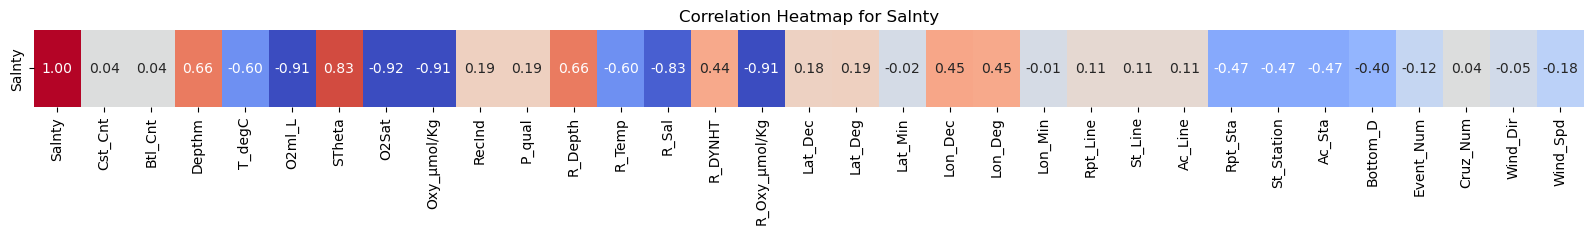

In [38]:
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 1))
sns.heatmap(correlation_matrix[['Salnty']].transpose(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap for Salnty')
plt.show()

In [39]:
correlation_matrix = subset_df.corr()

correlation_with_salnty = correlation_matrix['Salnty']

correlation_df = pd.DataFrame(correlation_with_salnty.items(), columns=['Column', 'Correlation_with_Salnty'])
correlation_df = correlation_df.sort_values(by='Correlation_with_Salnty', ascending=False).reset_index()

In [40]:
drop_df = correlation_df[abs(correlation_df.Correlation_with_Salnty) < 0.49]
drop_list = drop_df['Column'].tolist()

new_df = subset_df.drop(columns=drop_list)
new_df

,Salnty,Sta_ID,Depth_ID,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,...,Year,Month,Julian_Date,Julian_Day,Time,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Wea
765355,34.155,086.7 110.0,20-0407JD-PR-203-1821-08671100-0500A-7,500,5.63,0.70,26.936,10.0,30.44201,503.0,...,2004,7,38189,203,18:21:00,RV DAVID STARR JORDAN,31JD,PR,87 110,1.0
765398,34.148,090.0 030.0,20-0407JD-MX-200-2210-09000300-0200A-7,200,9.25,2.08,26.415,32.2,90.50218,201.0,...,2004,7,38186,200,22:10:00,RV DAVID STARR JORDAN,31JD,MX,90 30,1.0
765400,34.184,090.0 030.0,20-0407JD-MX-200-2210-09000300-0250A-7,250,8.72,1.75,26.528,26.8,76.13528,251.0,...,2004,7,38186,200,22:10:00,RV DAVID STARR JORDAN,31JD,MX,90 30,1.0
765402,34.259,090.0 030.0,20-0407JD-MX-200-2210-09000300-0300A-7,300,8.50,1.20,26.621,18.3,52.20232,302.0,...,2004,7,38186,200,22:10:00,RV DAVID STARR JORDAN,31JD,MX,90 30,1.0
765405,34.301,090.0 030.0,20-0407JD-MX-200-2210-09000300-0400A-7,400,7.81,0.70,26.759,10.5,30.44726,403.0,...,2004,7,38186,200,22:10:00,RV DAVID STARR JORDAN,31JD,MX,90 30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,070.0 055.0,20-1101NM-MX-031-1553-07000550-0250A-7,250,8.03,1.45,26.573,21.8,63.08076,252.0,...,2011,1,40574,31,15:53:00,RV NEW HORIZON,32NM,MX,70.0 55.0,1.0
817762,34.166,070.0 055.0,20-1101NM-MX-031-1553-07000550-0300A-7,300,7.58,1.12,26.685,16.7,48.71913,302.0,...,2011,1,40574,31,15:53:00,RV NEW HORIZON,32NM,MX,70.0 55.0,1.0
817765,34.191,070.0 055.0,20-1101NM-MX-031-1553-07000550-0400A-7,400,6.95,0.72,26.794,10.6,31.31612,403.0,...,2011,1,40574,31,15:53:00,RV NEW HORIZON,32NM,MX,70.0 55.0,1.0
817767,34.255,070.0 055.0,20-1101NM-MX-031-1553-07000550-0500A-7,500,6.03,0.40,26.966,5.7,17.39493,504.0,...,2011,1,40574,31,15:53:00,RV NEW HORIZON,32NM,MX,70.0 55.0,1.0


In [41]:
new_df = new_df.drop(['Sta_ID', 'Depth_ID', 'Ship_Name', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 
                      'Cast_ID', 'Quarter', 'Sta_Code', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID'], axis=1)

In [42]:
new_df

,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,R_Temp,R_Sal,R_Oxy_µmol/Kg,Date,Year,Month,Julian_Date,Julian_Day,Time,Wea
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,503.0,5.59,117.4,30.44201,07/21/2004,2004,7,38189,203,18:21:00,1.0
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,201.0,9.23,164.5,90.50218,07/18/2004,2004,7,38186,200,22:10:00,1.0
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,251.0,8.69,154.6,76.13528,07/18/2004,2004,7,38186,200,22:10:00,1.0
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,302.0,8.47,146.5,52.20232,07/18/2004,2004,7,38186,200,22:10:00,1.0
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,403.0,7.77,134.9,30.44726,07/18/2004,2004,7,38186,200,22:10:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,252.0,8.00,149.9,63.08076,01/31/2011,2011,1,40574,31,15:53:00,1.0
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,302.0,7.55,139.9,48.71913,01/31/2011,2011,1,40574,31,15:53:00,1.0
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,403.0,6.91,130.8,31.31612,01/31/2011,2011,1,40574,31,15:53:00,1.0
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,504.0,5.99,115.1,17.39493,01/31/2011,2011,1,40574,31,15:53:00,1.0


In [43]:
le = preprocessing.LabelEncoder()
object_columns = new_df.select_dtypes(include=['object']).columns
for col in object_columns:
    new_df[col] = le.fit_transform(new_df[col])
    print('Correlation between ' + col + ' and Salinity')
    print(stats.pointbiserialr(new_df[col], new_df['Salnty']))
    print('')

Correlation between Date and Salinity
PointbiserialrResult(correlation=-0.025219577203320236, pvalue=0.2596038442722216)

Correlation between Year and Salinity
PointbiserialrResult(correlation=0.03631930849422875, pvalue=0.104425095010671)

Correlation between Month and Salinity
PointbiserialrResult(correlation=-0.015298075991927118, pvalue=0.49412480288037697)

Correlation between Julian_Date and Salinity
PointbiserialrResult(correlation=0.03399651382104161, pvalue=0.12854638445216793)

Correlation between Julian_Day and Salinity
PointbiserialrResult(correlation=-0.027200024510700846, pvalue=0.22402814537151225)

Correlation between Time and Salinity
PointbiserialrResult(correlation=-0.010635803632873773, pvalue=0.6345277792163928)

Correlation between Wea and Salinity
PointbiserialrResult(correlation=-0.03432213053812391, pvalue=0.1249251810091895)



In [44]:
new_df

,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,R_Temp,R_Sal,R_Oxy_µmol/Kg,Date,Year,Month,Julian_Date,Julian_Day,Time,Wea
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,503.0,5.59,117.4,30.44201,153,0,5,6,100,168,1
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,201.0,9.23,164.5,90.50218,149,0,5,5,97,251,1
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,251.0,8.69,154.6,76.13528,149,0,5,5,97,251,1
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,302.0,8.47,146.5,52.20232,149,0,5,5,97,251,1
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,403.0,7.77,134.9,30.44726,149,0,5,5,97,251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,252.0,8.00,149.9,63.08076,34,7,0,217,28,107,1
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,302.0,7.55,139.9,48.71913,34,7,0,217,28,107,1
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,403.0,6.91,130.8,31.31612,34,7,0,217,28,107,1
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,504.0,5.99,115.1,17.39493,34,7,0,217,28,107,1


In [45]:
new_df = new_df.drop(columns=['Date', 'Julian_Date', 'Julian_Day', 'Time', 'Wea'])
new_df = new_df.drop(columns=['R_Depth', 'R_Temp', 'R_Sal', 'R_Oxy_µmol/Kg'])

In [46]:
new_df.describe()

,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Year,Month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0000,2000.000000
mean,34.148147,337.085500,7.440765,1.396790,26.682387,21.03480,60.768800,1.9700,4.510500
std,0.133922,119.334054,1.228681,0.935224,0.261954,14.69631,40.708973,1.3187,3.059505
min,32.948000,0.000000,3.880000,0.020000,24.133000,0.30000,0.869814,0.0000,0.000000
25%,34.079000,250.000000,6.450000,0.640000,26.545000,9.30000,27.834270,1.0000,3.000000
50%,34.167000,300.000000,7.530000,1.230000,26.679000,18.25000,53.500840,2.0000,5.000000
75%,34.238000,400.000000,8.300000,1.920000,26.867000,28.92500,83.529488,3.0000,8.000000
max,34.459000,1000.000000,18.050000,6.400000,27.376000,118.40000,279.076500,8.0000,9.000000


In [47]:
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Year,Month
Salnty,1.000000,0.655432,-0.601500,-0.913474,0.833721,-0.915151,-0.913574,0.036319,-0.015298
Depthm,0.655432,1.000000,-0.890992,-0.786432,0.865643,-0.784476,-0.786352,0.104329,-0.033599
T_degC,-0.601500,-0.890992,1.000000,0.765085,-0.938358,0.782839,0.765217,-0.080229,0.003875
O2ml_L,-0.913474,-0.786432,0.765085,1.000000,-0.901895,0.998287,1.000000,-0.056561,0.008460
STheta,0.833721,0.865643,-0.938358,-0.901895,1.000000,-0.918529,-0.902072,0.057620,-0.007952
O2Sat,-0.915151,-0.784476,0.782839,0.998287,-0.918529,1.000000,0.998325,-0.051644,0.006991
Oxy_µmol/Kg,-0.913574,-0.786352,0.765217,1.000000,-0.902072,0.998325,1.000000,-0.056494,0.008445
Year,0.036319,0.104329,-0.080229,-0.056561,0.057620,-0.051644,-0.056494,1.000000,-0.278282
Month,-0.015298,-0.033599,0.003875,0.008460,-0.007952,0.006991,0.008445,-0.278282,1.000000


In [48]:
new_df

,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Year,Month
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,0,5
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,0,5
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,0,5
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,0,5
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,0,5
...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,7,0
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,7,0
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,7,0
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,7,0


In [49]:
new_df.to_csv("ocean.csv")